## Importing data from a file into python... 
### 1) simplest: a list of ascii numbers
### 2) a CSV file (i.e. exported from excel). 
### 3) a mixture... digging in by "hand"
### 4) custom formats created in different fields.. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

In [8]:
path_to_data = '../0_data_examples/other/'

# 1) tab delimited ascii (text) of ONLY NUMBERS ! 
###  np.loadtxt  (https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)

In [9]:
# a path to the data and the name of the file ! 
filename = 'simplenums.txt'
open_this = path_to_data + filename
print(open_this)

../0_data_examples/other/simplenums.txt


In [10]:
simpnums = np.loadtxt(open_this)
print(simpnums)

[[  0.    71.7  409.32]
 [  1.    72.1  410.31]
 [  2.    73.9  423.38]
 [  3.    74.2  437.4 ]
 [  4.    76.1  442.87]
 [  5.    76.6  459.2 ]
 [  6.    79.7  461.9 ]
 [  7.    80.4  477.33]]


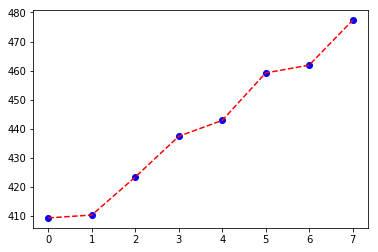

In [13]:
plt.plot(simpnums[:,0], simpnums[:,2],'bo')
x = simpnums[:,0]
y = simpnums[:,2]
plt.plot(x,y,'r--')

# 2) CSV (comma separated values)
### this is what would be exported from a spreadsheet.. an old standard. 


### 1. np.genfromtext  (https://docs.scipy.org/doc/numpy/user/basics.io.genfromtxt.html) 

In [21]:
filename = 'argo_profile.csv'
open_this = path_to_data + filename
print(open_this)

../0_data_examples/other/argo_profile.csv


In [22]:
data = np.genfromtxt(open_this, delimiter=',', skip_header=1) 
# csv: delimiter=','
# tab separated values: delimiter='\t'
# skiprow because there is a header
print(data.shape)
print(data[1,:])

(100, 7)
[ 6.900972e+06  1.125420e+05  3.989000e+01 -2.759400e+01  1.000000e+00
  1.373400e+01  3.583500e+01]


In [23]:
data_rec = np.genfromtxt(open_this, delimiter=',', names=True) 
# this last thing makes a "record array"; it has a different shape
print(data_rec[1])
print(data_rec.shape)
print(data_rec.dtype)  # this tagging format is called a "record array" 

S = data_rec['SAL'] # using the name (string) as the identifyers of the fields.. 
T = data_rec['TEMP'] 
P = data_rec['PRES'] 
# f8 = 64-bit floating-point number
# < = "little endian"  

(6900972., 112542., 39.89, -27.594, 1., 13.734, 35.835)
(100,)
[('PLATFORM', '<f8'), ('ARGOS_ID', '<f8'), ('LATITUDE', '<f8'), ('LONGITUDE', '<f8'), ('PRES', '<f8'), ('TEMP', '<f8'), ('SAL', '<f8')]


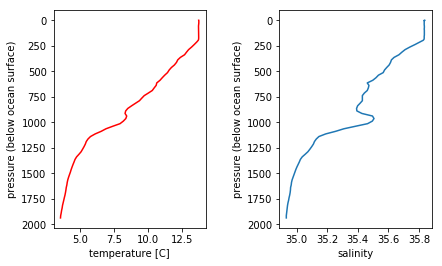

In [24]:
f,(ax1, ax2) = plt.subplots(1,2)

ax1.plot(T,P, 'r-')
ax1.invert_yaxis()
ax1.set_xlabel('temperature [C]')
ax1.set_ylabel('pressure (below ocean surface)')

ax2.plot(S,P)
ax2.invert_yaxis()
ax2.set_xlabel('salinity')
ax2.set_ylabel('pressure (below ocean surface)')
pos1 = ax2.get_position() # get the original position 
pos2 = [pos1.x0 + 0.1, pos1.y0, pos1.width, pos1.height] 
ax2.set_position(pos2) # set a new position



### 2. python csv module  (https://docs.python.org/3/library/csv.html)
#### FYI, but I haven't used it. 

# PANDAS !! very very useful tools ! 

In [25]:
# pandas read a csv file ! 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

# another very useful one is pandas.read_excel() -- 

# the df indicates "dataframe", the standard multi-column structure (and class) in pandas
argo_df = pd.read_csv(path_to_data +'argo_profile.csv')
print(argo_df.columns)

Index(['PLATFORM', 'ARGOS_ID', 'LATITUDE', 'LONGITUDE', 'PRES', 'TEMP', 'SAL'], dtype='object')


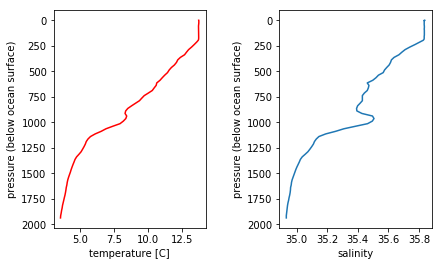

In [26]:
f,(ax1, ax2) = plt.subplots(1,2)
T = argo_df.TEMP
P = argo_df.PRES
S = argo_df.SAL

ax1.plot(T,P, 'r-')
ax1.invert_yaxis()
ax1.set_xlabel('temperature [C]')
ax1.set_ylabel('pressure (below ocean surface)')

ax2.plot(S,P)
ax2.invert_yaxis()
ax2.set_xlabel('salinity')
ax2.set_ylabel('pressure (below ocean surface)')
pos1 = ax2.get_position() # get the original position 
pos2 = [pos1.x0 + 0.1, pos1.y0, pos1.width, pos1.height] 
ax2.set_position(pos2) # set a new position

In [27]:
# WRITE A PICKLE ! (PICKLE YOUR PANDA ! )
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_pickle.html

argo_df.to_pickle(path_to_data + 'argo_df.pkl')

argo_df_pkld = pd.read_pickle(path_to_data + 'argo_df.pkl' )
print(argo_df_pkld.columns)

Index(['PLATFORM', 'ARGOS_ID', 'LATITUDE', 'LONGITUDE', 'PRES', 'TEMP', 'SAL'], dtype='object')


Index(['ID', 'date', 'time', 'lat', 'lon', 'depth_km', 'mag1', 'mag2', 'mag3',
       'mt1', 'mt2', 'mt3', 'mt4', 'mt5', 'mt6'],
      dtype='object')


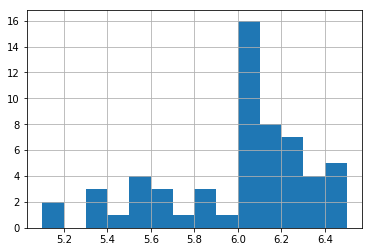

In [38]:
# read in a text file, with no column headings:

eq_cat_df = pd.read_csv(path_to_data + 'parsedCMT_subset.txt', sep = '\t', header=None)
eq_cat_df.columns = ['ID','date','time','lat','lon','depth_km','mag1','mag2','mag3','mt1','mt2','mt3','mt4','mt5','mt6']
# check later which types of magnitude they are, and what the moment tensor (mt) components are called, and their sequence
print(eq_cat_df.columns)

#plt.plot(eq_cat_df.mag1, 'ko');

hist = eq_cat_df.mag1.hist(bins=14)

# 4) digging in... (by "hand") 
## This part involves opening up the file and reading it line by line, parsing the data as it comes out.. for more flexibility and control.. 

In [39]:
import sys
import math
import datetime

In [40]:
# the other way: passing the filename when i call it: 
def read_file(OpenThisFile): 
# this is GOOD STYLE (rm), decompose decompose ! 
# making a separate function because it makes it easier to understand
    try:
        fi = open(OpenThisFile, 'r')
    except IOError: 
        print('Can\'t open file...... BUUUUUUUUUTTTT whyyy nnnnooooootttttt ???')
        sys.exit(0)
    return fi  # means that it exists outside 

In [41]:
def file_len(OpenThisFile):
    with open(OpenThisFile) as f:
        for i, l in enumerate(f):
            pass
    return i + 1


In [42]:
filename = 'parsedCMT_subset.txt'
open_this = path_to_data + filename
fi = read_file(open_this)

In [43]:
num_eqs = file_len(open_this)
print(num_eqs)

58


In [44]:
# NOW LETS GET THE DATA OUT ! 

# initialize the lists:
time_vec = []
depth_vec = []
Mw_vec = []

# ==================================================
open_this = path_to_data + filename
# for some reason, it seems that the file needs to be read in again, after running once (as if it gets eaten)
fi = read_file(open_this)
testline = fi.readline()
print(testline)

#while 1:
for i in range(num_eqs): 
    line = fi.readline()
    if not line: 
        print('NO LINE TO READ')
        break
    cols = line.split('\t')

    date = cols[1]
    time = cols[2]
    #print(date)
    
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:10])
    hour = int(time[0:2])
    minute = int(time[3:5])
    second= int(time[6:8])

    ## convert to julian day
    dt = datetime.datetime(year, month, day)
    tt = dt.timetuple()
    jDay = tt.tm_yday
    #print(jDay)
    ## convert to milliseconds:
    time_ms = second*1000. + minute*60.*1000. + hour*60.*60.*1000. + jDay*24.*60.*60.*1000. + year*365.25*24.*60.*60.*1000.
    #print(time_ms)
    
    # read in the moment magnitude Mw and depth
    Mw = float(cols[8])
    depth_km = cols[5]
    #print(Mw)

    # assign arrays
    time_vec.append(time_ms)
    Mw_vec.append(Mw)
    depth_vec.append(depth_km)

    
## outside of loop: 
# convert to np arrays ! 
print(type(time_ms))
time_vec = np.array(time_vec)
time_vec_0 = (time_vec - time_vec[0])/(1000*3.14e7)
# note that this operation won't work on a list ! 

#len(time_vec_0)
#len(Mw_vec)

M010176A	1976/01/01	01:29:39.6	-29.25	-176.96	 47.8	6.2 	0.0 	7.25363859485	202 	30 	  93	 18 	60 	  88

NO LINE TO READ
<class 'float'>


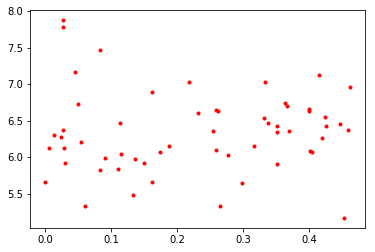

In [45]:
plt.plot(time_vec_0,Mw_vec, 'r.')
